## Visualisation Prototype

### Introduction
In a data-driven world, the ability to distill complex information into visually comprehensible formats is paramount. The Visualisation Prototype we present is a powerful tool that bridges the gap between raw data and meaningful insights. It is a window into the art and science of data visualization, where data transforms into compelling stories, patterns emerge from chaos, and understanding blossoms from the numbers.

In [2]:
# Initialising and importing libraries used

import pandas as pd
import geopandas as gpd
import io, requests
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

#### BIODIVERSITY HOTSPOT VISUALISATION

In [4]:
# Load the Biodiversity Hotspot datasets used

world_biodiversity_hotspots = gpd.read_file(r'/home/naza/Downloads/CI_BiodiversityHotspots.geojson')
world_biodiversity_hotspots.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [5]:
# Functions defined for mapping each datasets
# For Biodiversity Hotspot
def map_biodiversity_hotspot_to_sdg(row):
    # Some biodiversity hotspots using the "NAME" row from the list above
    marine_biodiversity_hotspots = [
        'Chilean Winter Rainfall and Valdivian Forests', 
        'Indo-Burma', 
        'Japan', 
        'Mesoamerica', 
        'Horn of Africa',
        'Sundaland',
        'Mediterranean Basin',
        'Coastal Forests of Eastern Africa'
    ]
    
    # verify whether this hotspot is known for marine or land biodiversity
    if row['NAME'] in marine_biodiversity_hotspots:
        return "SDG #14: Life below Water"
    else:
        return "SDG #15: Life on Land"

In [8]:
# Implement the mapping function defined and save the datasets 
world_biodiversity_hotspots['SDG_MAPPING'] = world_biodiversity_hotspots.apply(map_biodiversity_hotspot_to_sdg, axis=1)
world_biodiversity_hotspots.to_file('CI_BiodiversityHotspots_Mapped.geojson', driver='GeoJSON')
#world_biodiversity
world_biodiversity_hotspots.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry,SDG_MAPPING
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111...",SDG #14: Life below Water
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7...",SDG #14: Life below Water
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -...",SDG #15: Life on Land
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -...",SDG #15: Life on Land
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161...",SDG #15: Life on Land


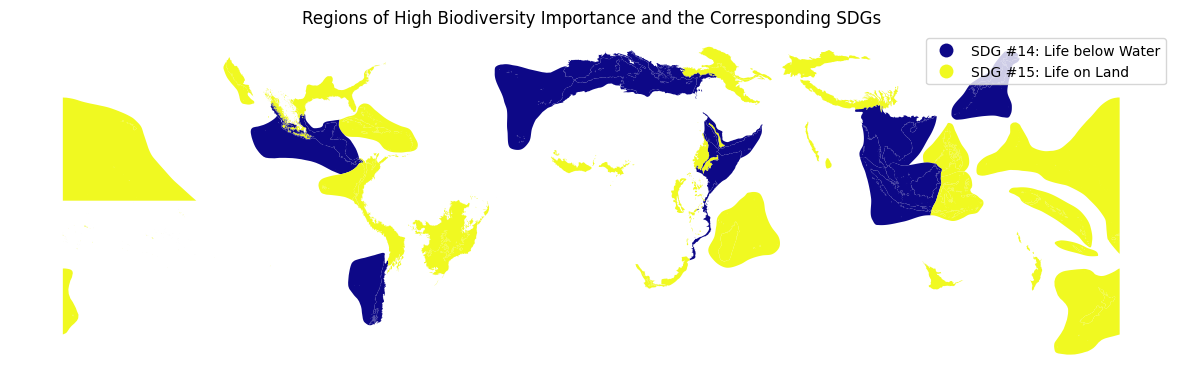

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
world_biodiversity_hotspots.plot(ax=ax, column='SDG_MAPPING', legend=True, cmap='plasma', legend_kwds={'bbox_to_anchor': (1, 1)})
ax.set_title("Regions of High Biodiversity Importance and the Corresponding SDGs")
ax.set_axis_off()
plt.show()

#### TERRESTRIAL ECOLOGICAL REGIONS VISUALISATION

In [14]:
# Load the Terrestrial Ecological Regions datasets used

terrestrial_eco_regions = gpd.read_file(r'/home/naza/Downloads/CI_BiodiversityHotspots.geojson')
terrestrial_eco_regions.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [15]:
# Functions defined for mapping each datasets (terrestrial ecological regions)
def map_terrestrial_regions_to_sdg(row):
    return "SDG #15: Life on Land & SDG #13: Climate Actions"

In [17]:
# Implement the mapping function defined and save the datasets 
terrestrial_eco_regions['SDG_MAPPING'] = terrestrial_eco_regions.apply(map_terrestrial_regions_to_sdg, axis=1)
terrestrial_eco_regions.to_file('TerrestrialEcoregionsoftheWorld_WWF.geojson', driver='GeoJSON')
terrestrial_eco_regions.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry,SDG_MAPPING
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111...",SDG #15: Life on Land & SDG #13: Climate Actions
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7...",SDG #15: Life on Land & SDG #13: Climate Actions
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -...",SDG #15: Life on Land & SDG #13: Climate Actions
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -...",SDG #15: Life on Land & SDG #13: Climate Actions
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161...",SDG #15: Life on Land & SDG #13: Climate Actions


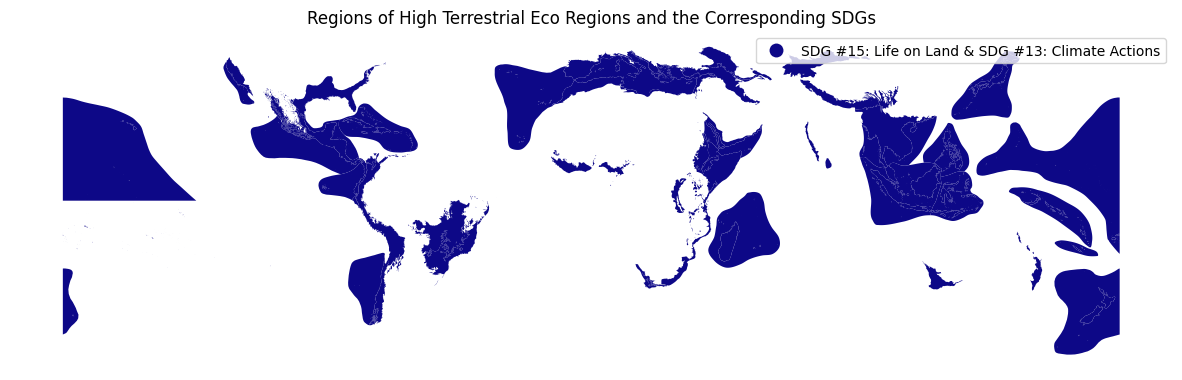

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
terrestrial_eco_regions.plot(ax=ax, column='SDG_MAPPING', legend=True, cmap='plasma', legend_kwds={'bbox_to_anchor': (1, 1)})
ax.set_title("Regions of High Terrestrial Eco Regions and the Corresponding SDGs")
ax.set_axis_off()
plt.show()